In [3]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from scipy.fftpack import dct, idct

from os import listdir

img_dir = "C:/Users/User/1. Python Beginners/images/25_sigma/"

# load images
filenames = listdir(img_dir)
filenames.sort()

imgs = []
for i in filenames:
    imgs.append((cv2.imread(img_dir + i,0).astype(np.float32)))

height, width = imgs[0].shape


In [8]:
# Create empty images
avg_image = np.zeros([height,width], np.float32)
cdt_avg_image = np.zeros([height,width], np.float32)

# Apply the weighted average to images and corresponding DCT images, respectively.
for i in range(len(imgs)):
    avg_image = cv2.addWeighted(avg_image, i/(i+1.0), imgs[i], 1/(i+1.0), 0)
    cdt_avg_image = cv2.addWeighted(cdt_avg_image, i/(i+1.0), dct(imgs[i]), 1/(i+1.0), 0)
    
reverse_image = idct(cdt_avg_image)

plt.imsave("noisy_images/00-dct_averaged_img.jpg", reverse_image, cmap="gray")
plt.imsave("noisy_images/00-averaged_img.jpg", avg_image, cmap="gray")


Text(0.5, 1.0, 'input image4')

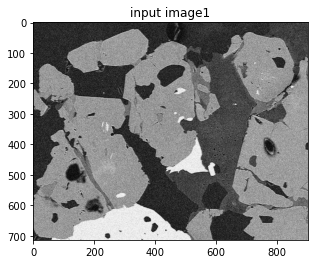

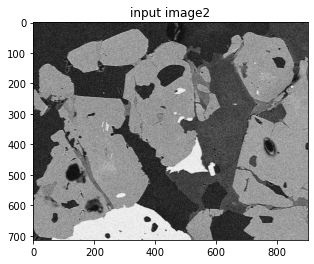

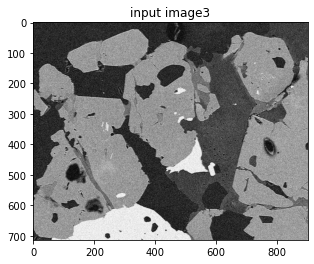

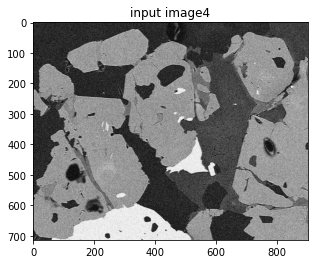

In [4]:
plt.figure()
plt.imshow(imgs[0], cmap='gray')
plt.title('input image1')
plt.figure()
plt.imshow(imgs[1], cmap='gray')
plt.title('input image2')
plt.figure()
plt.imshow(imgs[2], cmap='gray')
plt.title('input image3')
plt.figure()
plt.imshow(imgs[3], cmap='gray')
plt.title('input image4')

Text(0.5, 1.0, 'Avg image')

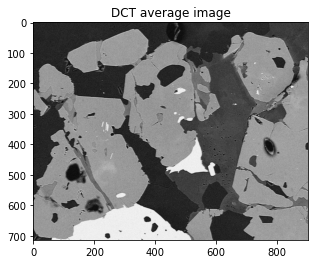

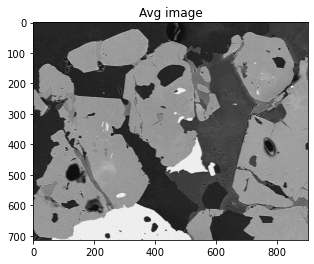

In [9]:
plt.figure()
plt.imshow(reverse_image, cmap='gray')
plt.title('DCT average image')
plt.figure()
plt.imshow(avg_image, cmap='gray')
plt.title('Avg image')
